In [5]:
%matplotlib inline


# Partial Dependence Plots


Partial dependence plots show the dependence between the target function [2]_
and a set of 'target' features, marginalizing over the
values of all other features (the complement features). Due to the limits
of human perception the size of the target feature set must be small (usually,
one or two) thus the target features are usually chosen among the most
important features.

This example shows how to obtain partial dependence plots from a
:class:`~sklearn.neural_network.MLPRegressor` and a
:class:`~sklearn.ensemble.GradientBoostingRegressor` trained on the
California housing dataset. The example is taken from [1]_.

The plots show four 1-way and two 1-way partial dependence plots (ommitted for
:class:`~sklearn.neural_network.MLPRegressor` due to computation time).
The target variables for the one-way PDP are: median income (`MedInc`),
average occupants per household (`AvgOccup`), median house age (`HouseAge`),
and average rooms per household (`AveRooms`).

We can clearly see that the median house price shows a linear relationship
with the median income (top left) and that the house price drops when the
average occupants per household increases (top middle).
The top right plot shows that the house age in a district does not have
a strong influence on the (median) house price; so does the average rooms
per household.
The tick marks on the x-axis represent the deciles of the feature values
in the training data.

We also observe that :class:`~sklearn.neural_network.MLPRegressor` has much
smoother predictions than
:class:`~sklearn.ensemble.GradientBoostingRegressor`. For the plots to be
comparable, it is necessary to subtract the average value of the target
``y``: The 'recursion' method, used by default for
:class:`~sklearn.ensemble.GradientBoostingRegressor`, does not account for
the initial predictor (in our case the average target). Setting the target
average to 0 avoids this bias.

Partial dependence plots with two target features enable us to visualize
interactions among them. The two-way partial dependence plot shows the
dependence of median house price on joint values of house age and average
occupants per household. We can clearly see an interaction between the
two features: for an average occupancy greater than two, the house price is
nearly independent of the house age, whereas for values less than two there
is a strong dependence on age.

On a third figure, we have plotted the same partial dependence plot, this time
in 3 dimensions.

.. [1] T. Hastie, R. Tibshirani and J. Friedman,
    "Elements of Statistical Learning Ed. 2", Springer, 2009.

.. [2] For classification you can think of it as the regression score before
       the link function.



Automatically created module for IPython interactive environment
Training MLPRegressor...
Computing partial dependence plots...


C:\Users\Marcus_Eduardo\anaconda3\envs\scienv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Training GradientBoostingRegressor...
Computing partial dependence plots...


C:\Users\Marcus_Eduardo\anaconda3\envs\scienv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Custom 3d plot via ``partial_dependence``


C:\Users\Marcus_Eduardo\anaconda3\envs\scienv\lib\site-packages\sklearn\inspection\_partial_dependence.py:508: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(
C:\Users\Marcus_Eduardo\AppData\Local\Temp\ipykernel_18256\3231360304.py:62: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


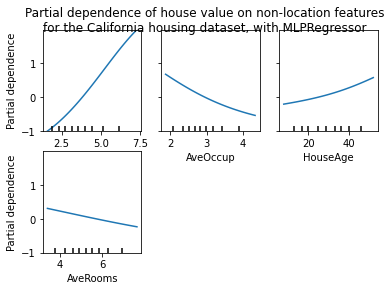

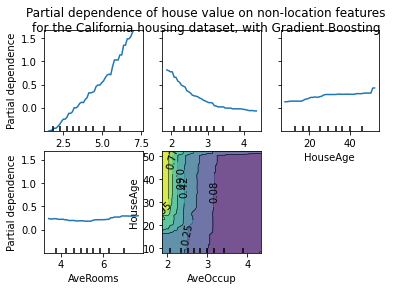

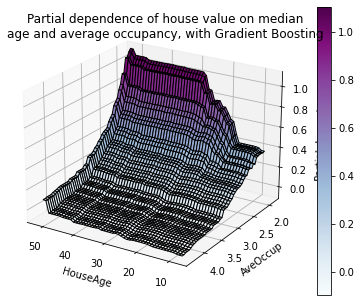

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing



def main():
    cal_housing = fetch_california_housing()

    X, y = cal_housing.data, cal_housing.target
    names = cal_housing.feature_names

    # Center target to avoid gradient boosting init bias: gradient boosting
    # with the 'recursion' method does not account for the initial estimator
    # (here the average target, by default)
    y -= y.mean()

    print("Training MLPRegressor...")
    est = MLPRegressor(activation='logistic')
    est.fit(X, y)
    print('Computing partial dependence plots...')
    # We don't compute the 2-way PDP (5, 1) here, because it is a lot slower
    # with the brute method.
    features = [0, 5, 1, 2]
    plot_partial_dependence(est, X, features, feature_names=names,
                            n_jobs=3, grid_resolution=50)
    fig = plt.gcf()
    fig.suptitle('Partial dependence of house value on non-location features\n'
                 'for the California housing dataset, with MLPRegressor')
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

    print("Training GradientBoostingRegressor...")
    est = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    est.fit(X, y)
    print('Computing partial dependence plots...')
    features = [0, 5, 1, 2, (5, 1)]
    plot_partial_dependence(est, X, features, feature_names=names,
                            n_jobs=3, grid_resolution=50)
    fig = plt.gcf()
    fig.suptitle('Partial dependence of house value on non-location features\n'
                 'for the California housing dataset, with Gradient Boosting')
    plt.subplots_adjust(top=0.9)

    print('Custom 3d plot via ``partial_dependence``')
    fig = plt.figure()

    target_feature = (1, 5)
    pdp, axes = partial_dependence(est, X, target_feature,
                                   grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy, with Gradient Boosting')
    plt.subplots_adjust(top=0.9)

    plt.show()


# Needed on Windows because plot_partial_dependence uses multiprocessing
if __name__ == '__main__':
    main()